In [1]:
#load the data
import pandas as pd
import matplotlib.pyplot as plt
currency=pd.read_csv("Downloads/Timeseries (1)/Timeseries/exchange_rate.csv",index_col="date",parse_dates=True)
currency_data=currency.dropna()
currency_data.tail(5)

,Ex_rate
date,
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197
09-10-2010 00:00,0.720825
10-10-2010 00:00,0.720825


In [3]:
currency=currency_data["Ex_rate"]
print(currency.info())

<class 'pandas.core.series.Series'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Series name: Ex_rate
Non-Null Count  Dtype  
--------------  -----  
7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB
None


<Axes: xlabel='date'>

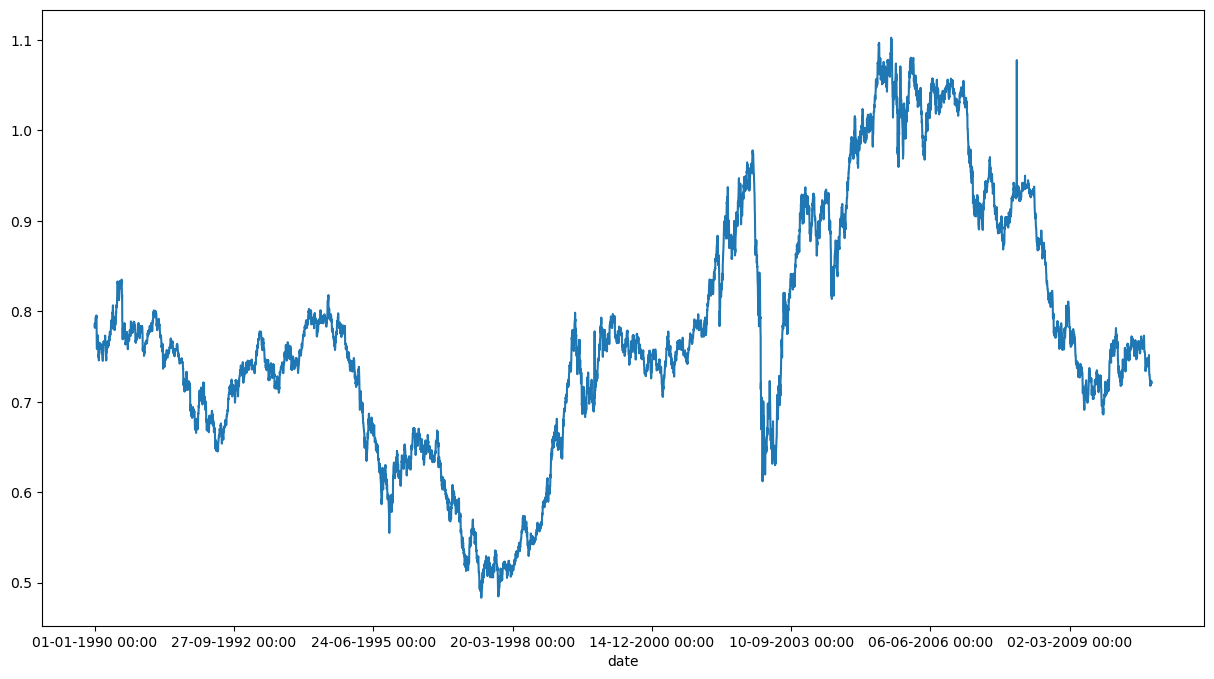

In [5]:
#plot the currency
currency.plot(figsize=(15,8))

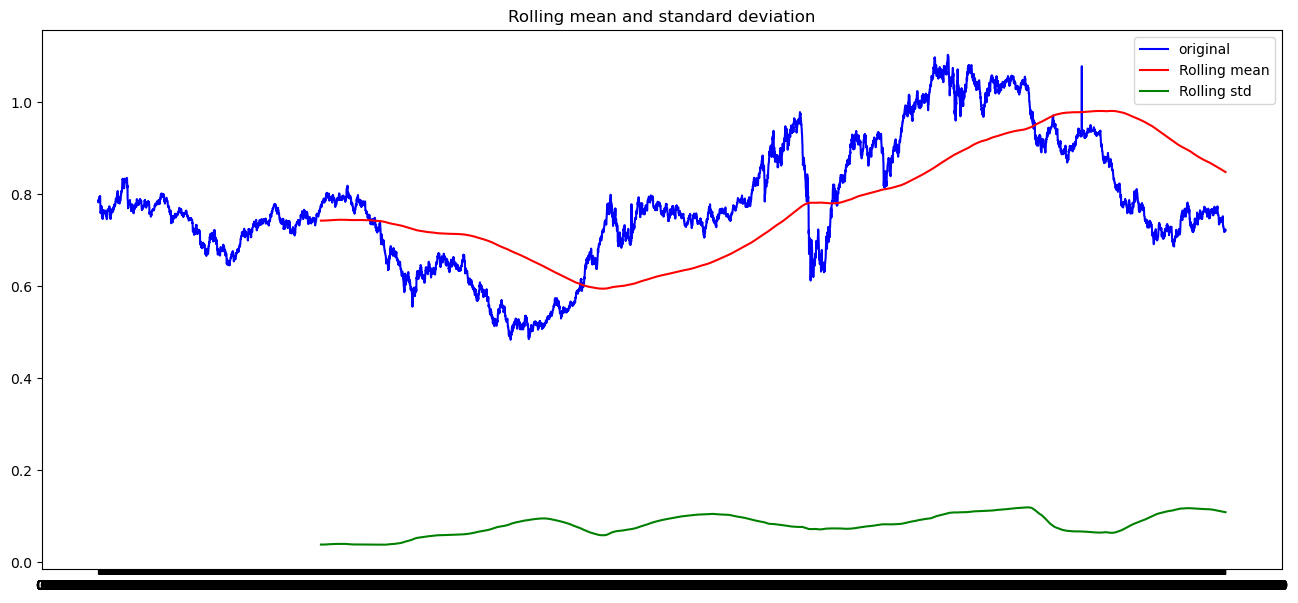

In [7]:
#Rolling stastistics
rollmean=currency.rolling(1500).mean()
rollstd=currency.rolling(1500).std()
plt.figure(figsize=(16,7))
fig=plt.figure(1)
#plot the rolling stastistics
org=plt.plot(currency,color="blue",label="original")
mean=plt.plot(rollmean,color="red",label="Rolling mean")
std=plt.plot(rollstd,color="green",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

<Axes: xlabel='date'>

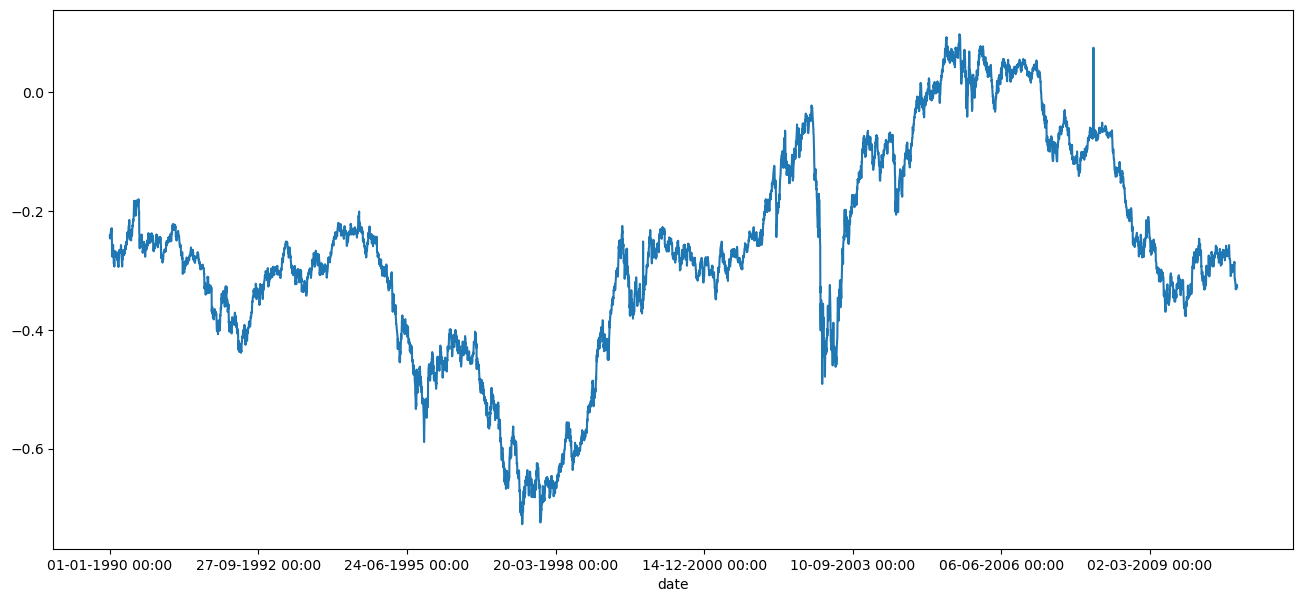

In [9]:
#make series stationary
plt.figure(figsize=(16,7))
fig=plt.figure(1)
import numpy as np
currency_log=np.log(currency)
currency_log.plot()

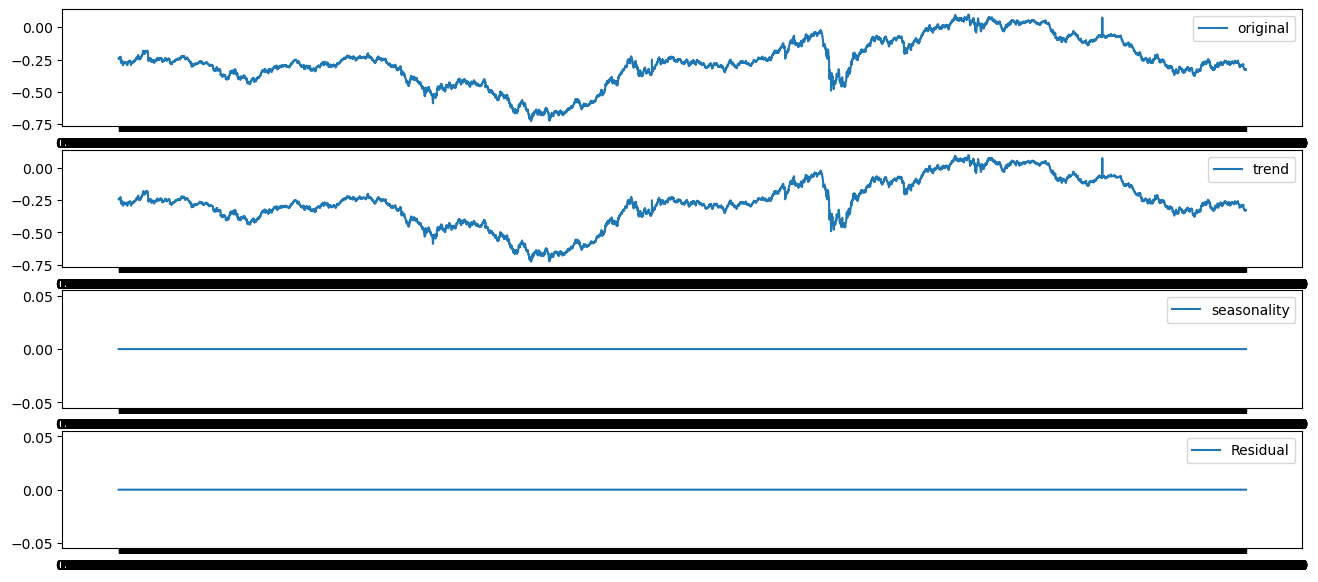

In [11]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(currency_log,filt=None,period=1,model="additive")
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.figure(figsize=(16,7))
fig=plt.figure(1)
plt.subplot(411)
plt.plot(currency_log,label="original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual,label="Residual")
plt.legend(loc="best")

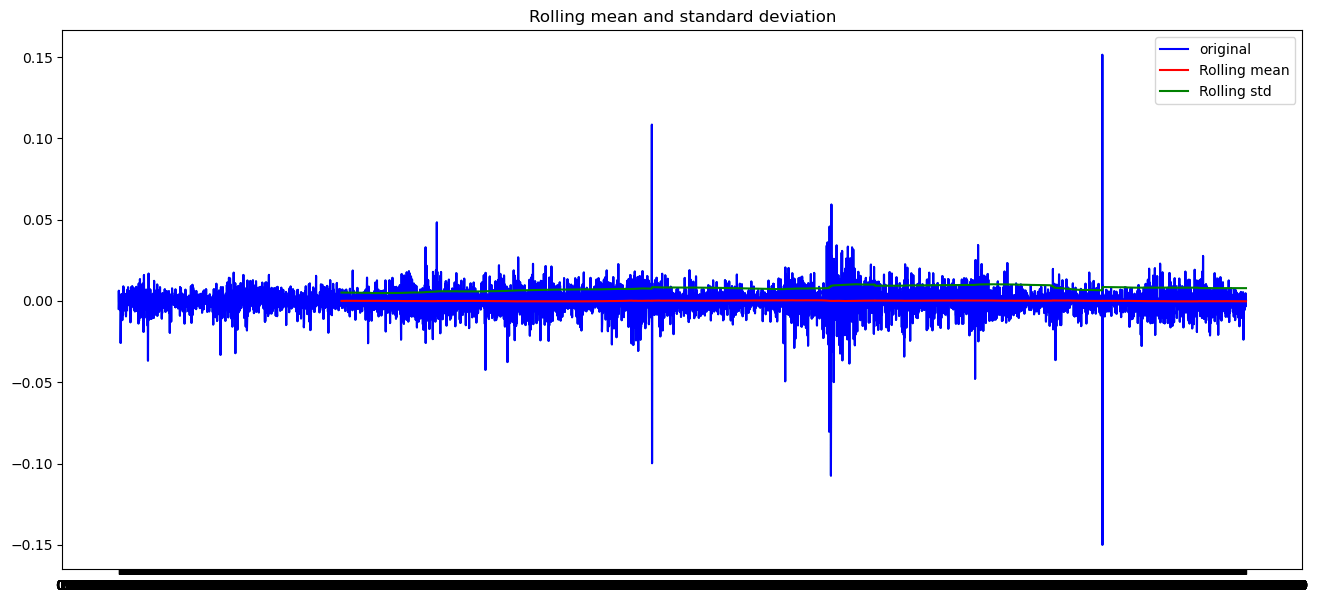

In [13]:
#Rolling stastistics
plt.figure(figsize=(16,7))
fig=plt.figure(1)
currency_log_diff=currency_log.diff()
plt.plot(currency_log_diff)

rollmean=currency_log_diff.rolling(1500).mean()
rollstd=currency_log_diff.rolling(1500).std()


#plot the rolling stastistics
org=plt.plot(currency_log_diff,color="blue",label="original")
mean=plt.plot(rollmean,color="red",label="Rolling mean")
std=plt.plot(rollstd,color="green",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [15]:
#select train and test set
currency_train=currency_log[0:6000]
currency_test=currency_log[6001:7500]

In [17]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(currency_train,autolag="AIC")
print(f"ADF stastistics: {adf_test[0]}")
print(f'p-value:{adf_test[1]}')
print(f'Num of lags:{adf_test[2]}')
print(f'num of observation used for ADF regression and critical value calculations:"{adf_test[3]}')
print("critical value")
for key,val in adf_test[4].items():
    print("\t",key,":",val)

ADF stastistics: -1.1883960415423263
p-value:0.678567416755009
Num of lags:29
num of observation used for ADF regression and critical value calculations:"5970
critical value
	 1% : -3.431445831483081
	 5% : -2.8620242563377154
	 10% : -2.567027767256158


Text(0.5, 1.0, 'Original')

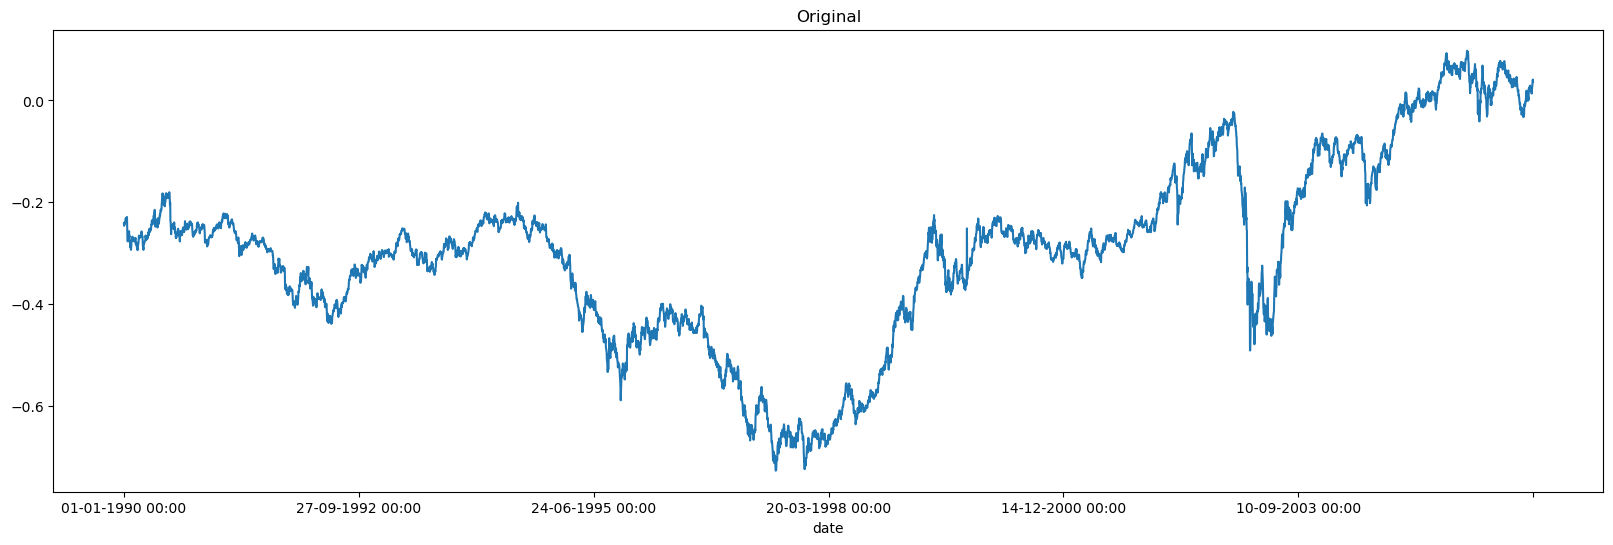

In [19]:
plt.figure(figsize=(20,6))
fig=plt.figure(1)
currency_train.plot()
plt.title("Original")

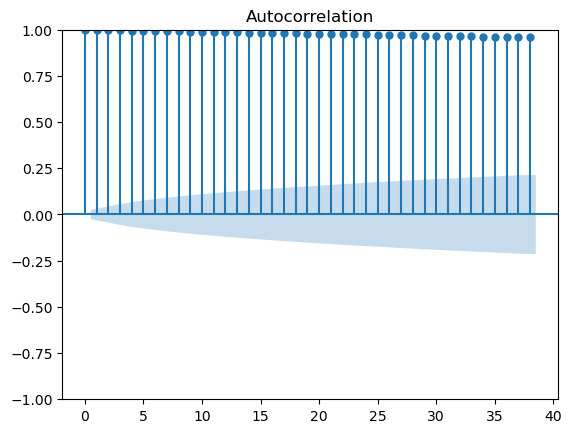

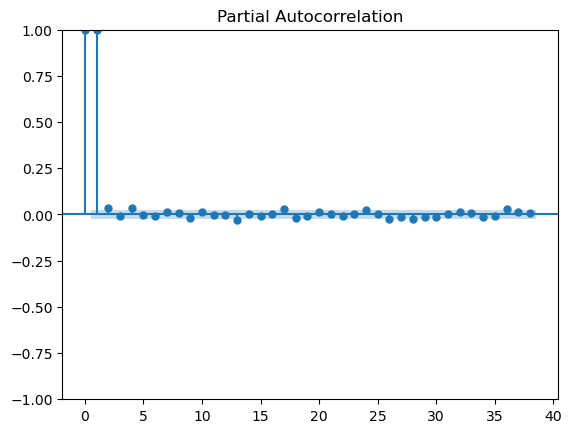

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_original=plot_acf(currency_train)
pacf_original=plot_pacf(currency_train)

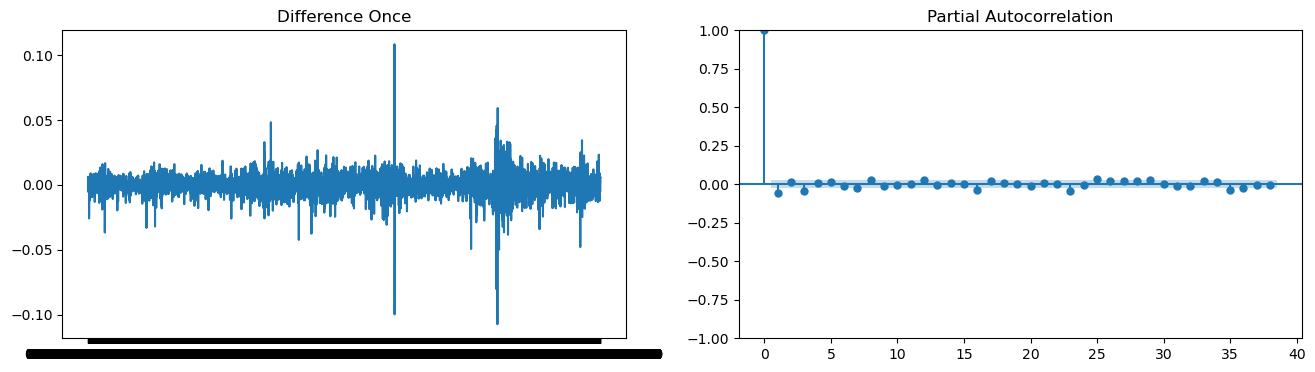

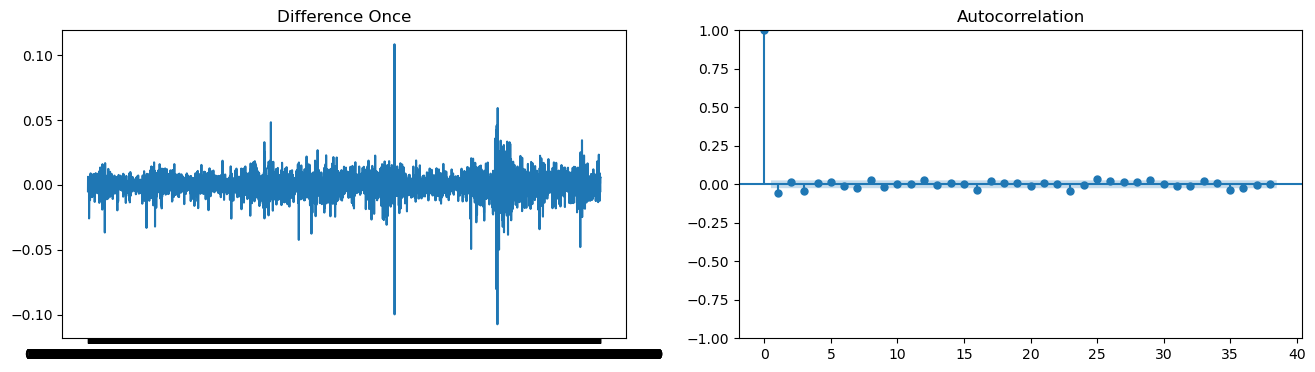

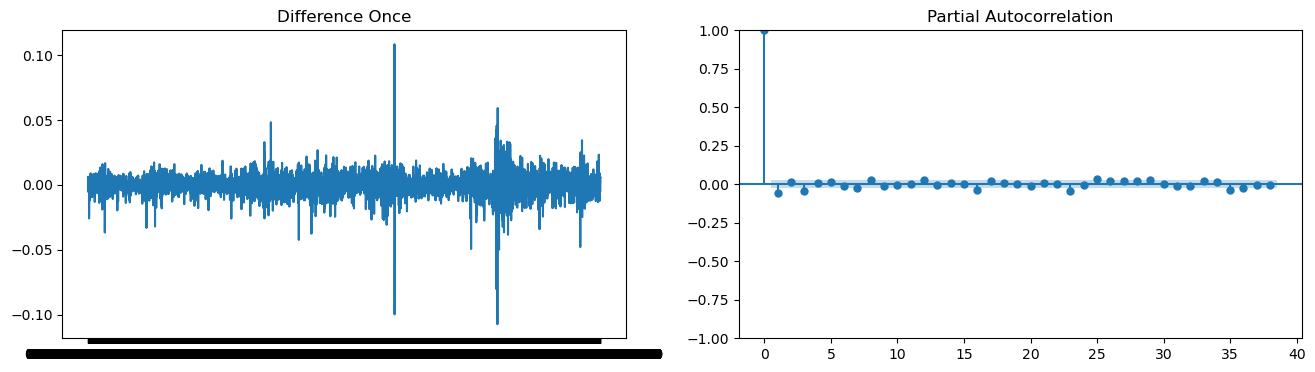

In [23]:
#Transform to stationary:Differencing
currency_train_dff=currency_train.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(currency_train_dff)
ax1.set_title("Difference Once")
plot_acf(currency_train_dff,ax=ax2)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(currency_train_dff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(currency_train_dff,ax=ax2)

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6000
Model:                 ARIMA(1, 1, 0)   Log Likelihood               20751.531
Date:                Thu, 26 Sep 2024   AIC                         -41499.061
Time:                        13:34:32   BIC                         -41485.663
Sample:                             0   HQIC                        -41494.408
                               - 6000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0544      0.005    -11.296      0.000      -0.064      -0.045
sigma2      5.794e-05   2.98e-07    194.735      0.000    5.74e-05    5.85e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

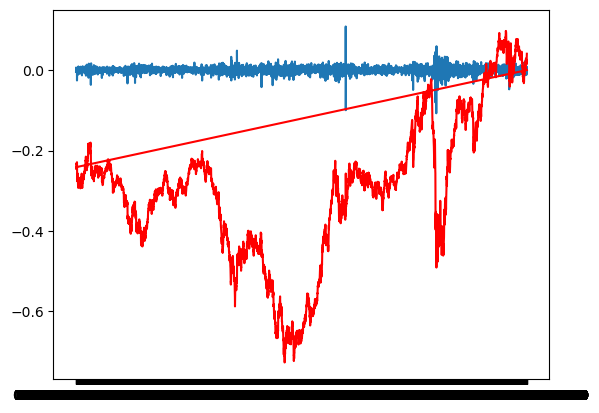

In [25]:
#Determine arima parameter 
#Fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(currency_train,order=(1,1,0))
model_fit=model.fit()
print(model_fit.summary())
plt.plot(currency_train_dff)
plt.plot(model_fit.fittedvalues,color="red")

In [27]:
arima_diff_prediction=pd.Series(model_fit.fittedvalues,copy=True)
print("Arima difference predictions:")
print(arima_diff_prediction.head())

Arima difference predictions:
date
01-01-1990 00:00    0.000000
02-01-1990 00:00   -0.241435
03-01-1990 00:00   -0.245899
04-01-1990 00:00   -0.240248
05-01-1990 00:00   -0.240750
dtype: float64


In [29]:
arima_diff_prediction_cumsum=arima_diff_prediction.cumsum()
print("Arima difference predictions cumsum:")
print(arima_diff_prediction_cumsum.head())

Arima difference predictions cumsum:
date
01-01-1990 00:00    0.000000
02-01-1990 00:00   -0.241435
03-01-1990 00:00   -0.487334
04-01-1990 00:00   -0.727583
05-01-1990 00:00   -0.968333
dtype: float64


In [31]:
arima_log_prediction=pd.Series(currency_log.iloc[0],index=currency_log.index)
arima_log_prediction=arima_log_prediction.add(arima_diff_prediction_cumsum,fill_value=0)
arima_log_prediction.head()

date
01-01-1990 00:00     -0.241435
01-01-1991 00:00    -91.517827
01-01-1992 00:00   -196.944495
01-01-1993 00:00   -330.271022
01-01-1994 00:00   -438.549040
dtype: float64

In [33]:
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing,Holt
data=currency[1:1500]
model_simp=SimpleExpSmoothing(data).fit(smoothing_level=0.1,optimized=False)
model_simp1=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


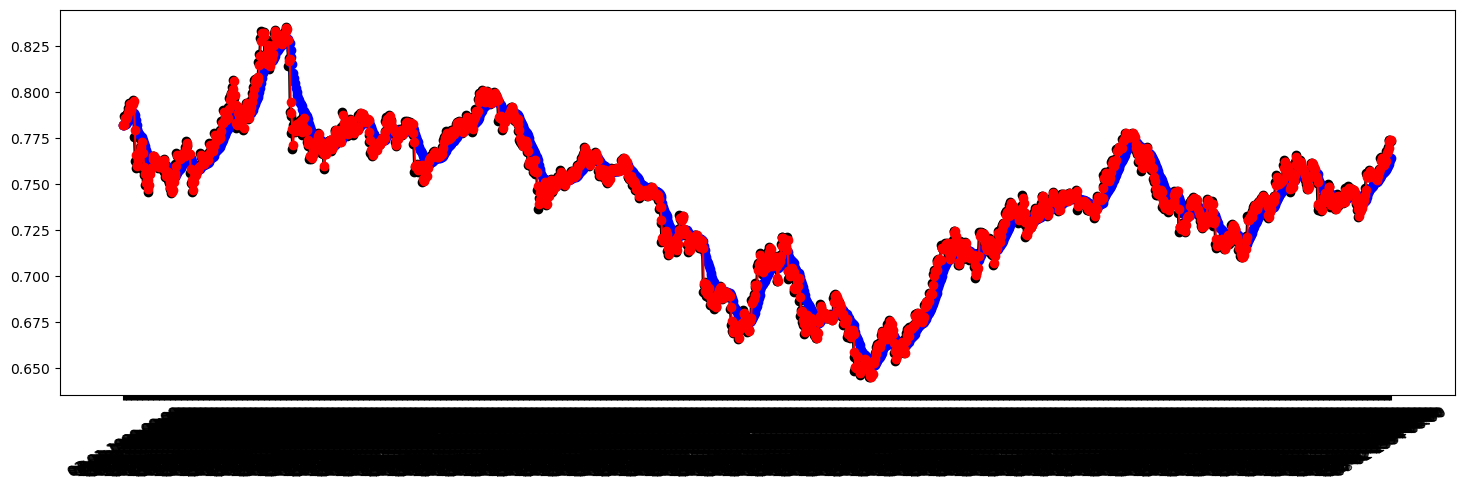

In [35]:
plt.figure(figsize=(18,5))
plt.plot(data,marker='o',color="black")
plt.xticks(rotation=30)
plt.plot(model_simp.fittedvalues,marker="o",color="blue")
plt.plot(model_simp1.fittedvalues,marker="o",color="red")

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


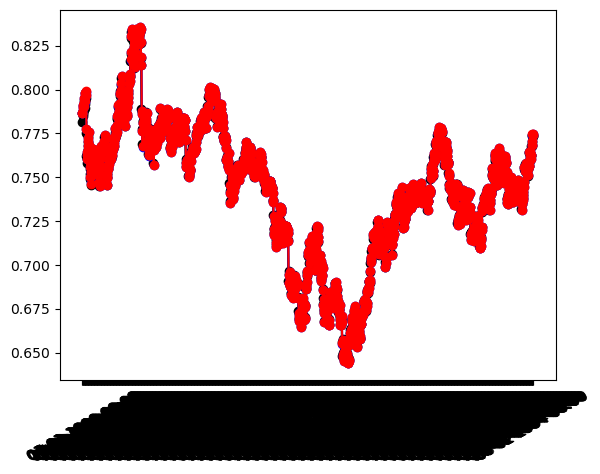

In [53]:
#Holt method for exponential smoothing
fit_holt=Holt(data).fit()
fit_holt1=Holt(data,exponential=True).fit()
plt.plot(data,marker='o',color="black")
plt.xticks(rotation=30)
plt.plot(fit_holt.fittedvalues,marker="o",color="blue")
plt.plot(fit_holt1.fittedvalues,marker="o",color="red")

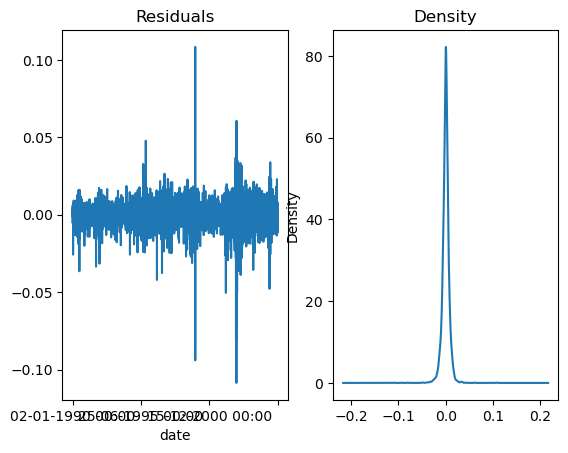

In [36]:
#Make Time series prediction
import matplotlib.pyplot as plt
residuals=model_fit.resid[1:]
fig,ax=plt.subplots(1,2)
residuals.plot(title="Residuals",ax=ax[0])
residuals.plot(title="Density",kind="kde",ax=ax[1])
plt.show()

In [39]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,start_p=3,
                            start_q=3,
                            max_p=5,
                            max_q=5,
                            test="adf",
                            seasonal=True,
                            trace=True)
    return automodel

arimamodel(currency_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-52501.977, Time=3.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-52425.562, Time=2.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-52501.373, Time=2.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-52500.927, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-52427.545, Time=0.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-52503.650, Time=4.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-52501.333, Time=5.92 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-52500.361, Time=4.91 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-52498.788, Time=10.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-52498.267, Time=4.56 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-52499.185, Time=9.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-52501.064, Time=4.66 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-52499.171, Time=12.05 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-52505.635, Time=2.51 sec
 AR

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6000
Model:                 ARIMA(2, 1, 3)   Log Likelihood               20762.012
Date:                Thu, 26 Sep 2024   AIC                         -41512.025
Time:                        14:21:14   BIC                         -41471.829
Sample:                             0   HQIC                        -41498.066
                               - 6000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4151      0.090     -4.614      0.000      -0.591      -0.239
ar.L2         -0.6537      0.094     -6.940      0.000      -0.838      -0.469
ma.L1          0.3622      0.090      4.043      0.0

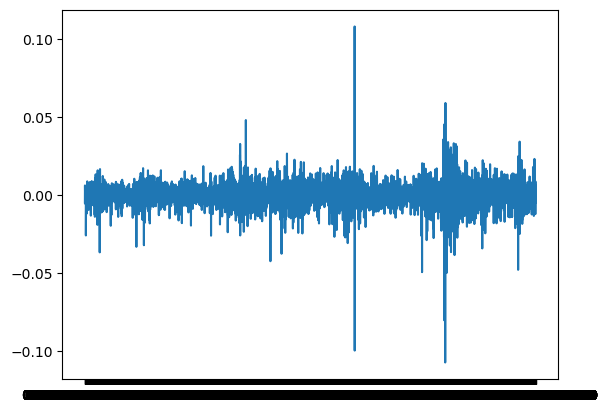

In [90]:
#Fit the best ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(currency_train,order=(2,1,3))
model_fit1=model.fit()
print(model_fit1.summary())
plt.plot(currency_train_dff)

In [102]:
start=len(currency_train)
end=len(currency_train)+len(currency_test)-1
pred=model_fit1.predict(start=start,end=end,typ="levels")
pred.index=currency.index[start:end+1]
print(pred)

date
06-06-2006 00:00    0.036332
07-06-2006 00:00    0.035890
08-06-2006 00:00    0.036240
09-06-2006 00:00    0.036383
10-06-2006 00:00    0.036095
                      ...   
09-07-2010 00:00    0.036199
10-07-2010 00:00    0.036199
11-07-2010 00:00    0.036199
12-07-2010 00:00    0.036199
13-07-2010 00:00    0.036199
Name: predicted_mean, Length: 1499, dtype: float64


C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [104]:
#calculate mean
print("Mean value:",end="")
m=currency_test.mean()
print(m)

Mean value:-0.1540940830183503


In [106]:
#calculate Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,currency_test))
print(rmse)

0.23156190484405473


In [92]:
#future time series for 30 days
start=len(currency_train)
end=len(currency_train)+len(currency_test)-1
pred=model_fit1.predict(start=start,end=end+30,typ="levels")
pred.index=currency.index[start:end+31]
print(pred)

date
06-06-2006 00:00    0.036332
07-06-2006 00:00    0.035890
08-06-2006 00:00    0.036240
09-06-2006 00:00    0.036383
10-06-2006 00:00    0.036095
                      ...   
08-08-2010 00:00    0.036199
09-08-2010 00:00    0.036199
10-08-2010 00:00    0.036199
11-08-2010 00:00    0.036199
12-08-2010 00:00    0.036199
Name: predicted_mean, Length: 1529, dtype: float64


C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='date'>

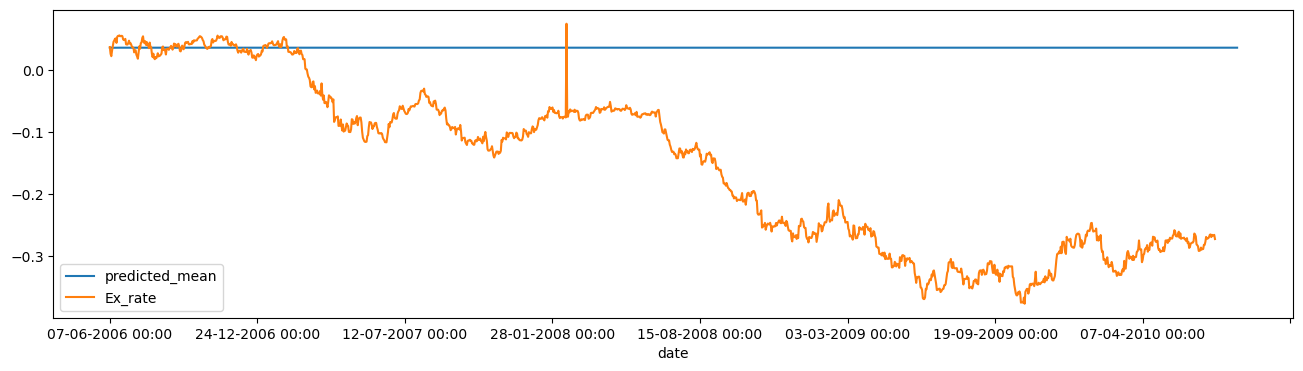

In [98]:

plt.figure(figsize=(16,4))
pred.plot(legend=True)
currency_test.plot(legend=True)

In [51]:
#calculate Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,currency_test))
print(rmse)

0.23166367028748602
